### PIBIC - EVALUATIONS OF THE PHYSICAL PROPERTIES OF DOUGH AND BREAD MADE WITH THE ADDITION OF BANANA AND SOY BIOMASS FLOURS

#### The code below is the code created in the Python programming language to perform cluster analysis of the image of the slices of bread prepared

#### Developed by PIBIC scholarship holder Vitor Kauã Oliveira de Souza, second year of Computer Science at the State University of Northern Paraná, supervised by professor PhD Luís Guilherme Sachs.

---

#### Inclusion of necessary libraries

##### NOTE: THE PATH PATH AND THE PATH_TO_MODULE VARIABLE ARE EXCLUSIVELY ON MY MACHINE. ON YOURS, YOU MUST HAVE YOUR PYTHON VIRTUAL ENVIRONMENT CONFIGURED AND WITH THE LIBRARIES INSTALLED AND IN THE VARIABLE, PASS THE PATH THAT IS ON YOUR MACHINE

In [10]:
import os
os.sys.path
import sys
path_to_module = "../venv/lib/python3.11/site-packages/"
sys.path.append(path_to_module)

#### Inclusion of necessary libraries

#### Including downloaded libraries in the virtual environment

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv

#### Main code

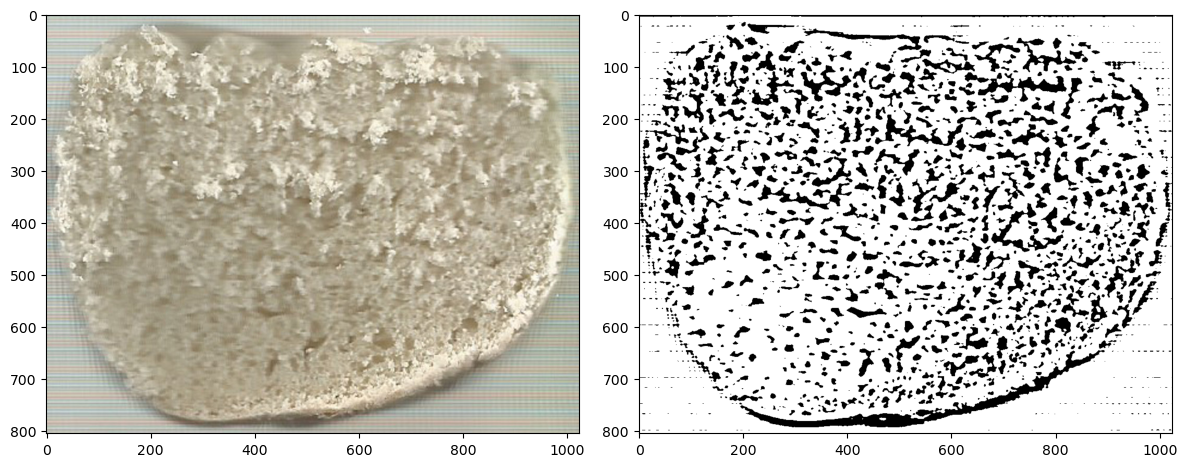

In [12]:
# Read and prepare image
img = cv2.imread('./../models/aline_models/exp1/1_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply adaptive thresholding
mask = cv2.adaptiveThreshold(blurred,
                              255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,
                              31,
                              10)

# Plot results

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

##### Binarized image plot to save it

In [4]:
ax = plt.subplots(1, figsize=(12,5))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
plt.tight_layout()

# Save the plotted image
#plt.savefig('./../models/aline_models/exp1/1_1_bin.jpg', bbox_inches='tight', pad_inches=0)

#### Counting black and white pixels

In [14]:
#Define variável para receber a imagem binarizada

# reading the image data from desired directory 
img = cv2.imread("./../models/aline_models/exp1/1_1_bin.jpg") 

In [8]:
# counting the number of pixels 
number_of_white_pix = np.sum(img == 255) 
number_of_black_pix = np.sum(img == 0) 
  
print('Number of white pixels:', number_of_white_pix) 
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 415875
Number of black pixels: 101418


#### Outlining the clusters and calculating the area of ​​each

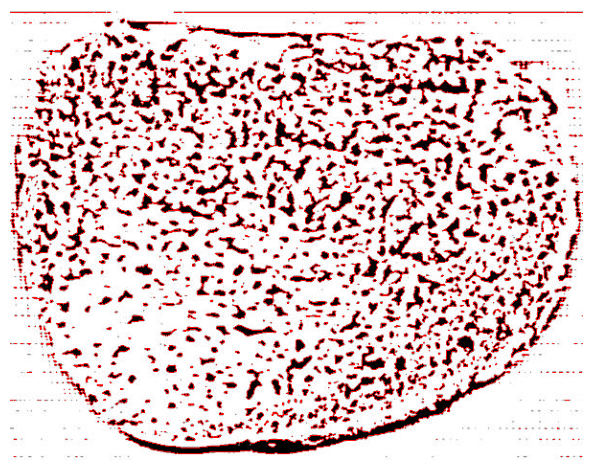

In [18]:
areas =[]
csv_file_path = './../models/aline_models/exp1/cluster_data_1_1.csv'

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,1)
contours,h = cv2.findContours(thresh,1,2)
counter = 0
for cnt in contours:
    cv2.drawContours(img,[cnt],0,(0,0,255),1)
    counter = counter + 1
    
    # Calculate the area (number of pixels) for each contour
    area = cv2.contourArea(cnt)
    areas.append(area)

areas.sort()

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Exp1_1', 'Number of Total Clusters'])
    csv_writer.writerow([counter])

    for i, area in enumerate(areas, start=1):
        csv_writer.writerow([f'Area of Cluster{i}', area])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.tight_layout()

# Save the image with contours
plt.savefig('./../models/aline_models/exp1/1_1_bin_contours.jpg', bbox_inches='tight', pad_inches=0)
plt.show()